# Demo: Compute a Confidence Interval with Bootstrapping

In [11]:
import numpy as np
from matplotlib import pyplot as plt

Load the data

In [6]:
traces = np.load('CaRaw.npy')
sound = np.load('AudFreq.npy')
sound = np.array(sound).flatten()
onsets = np.load('StimOn.npy')
onsets=onsets.reshape(len(onsets),)
scan_time = np.load('CaTimeStamp.npy').reshape(71190,)

Compute the PSTHs

In [3]:
closest_values = np.array([np.abs(scan_time - x).argmin() for x in onsets])
input_data = []
traces = traces.T
means = np.mean(traces, 1).reshape(traces.shape[0], 1)
stdevs = np.std(traces, 1).reshape(traces.shape[0], 1)
# z-scoring the events
traces = (traces - means) / stdevs
for i in closest_values:
            
    pre_event_slice = traces[:, i - 150:i]
    event_slice = traces[:, i].reshape(len(traces), 1)  
    post_event_slice = traces[:, i:i + 150]
            
    # Normalize the slices (remove the pre-event means)
    pre_event_means = np.mean(pre_event_slice, 1).reshape(pre_event_slice.shape[0], 1)
    post_event_slice -= pre_event_means
    pre_event_slice -= pre_event_means
            
    # Concatenate pre-event, event, and post-event slices
    concatenated_slice = np.concatenate([pre_event_slice, event_slice, post_event_slice], axis=1)  # Shape: (29, 121)
    input_data.append(concatenated_slice)
    
input_data=np.array(input_data)[:,:,90:]

Select one cell and frequency

In [9]:
freq = 8000
cell = 61
resp = input_data[sound==freq][:, cell, :]
t=np.arange(-2,5+1/30, 1/30)
n_trials, n_samples = resp.shape
n_trials

40

Plot the single trial PSTHs - there is a lot of variablility

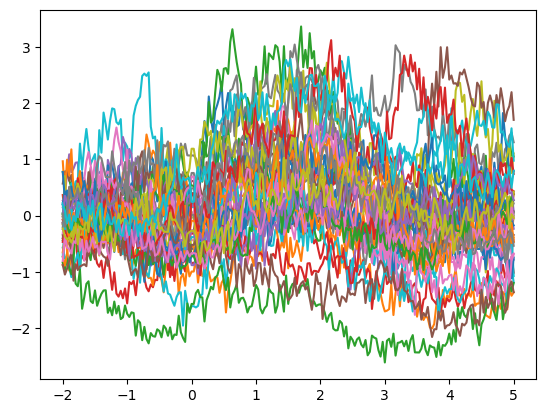

In [12]:
plt.plot(t, resp.T);

Plot the mean PSTH - how stable is this mean?

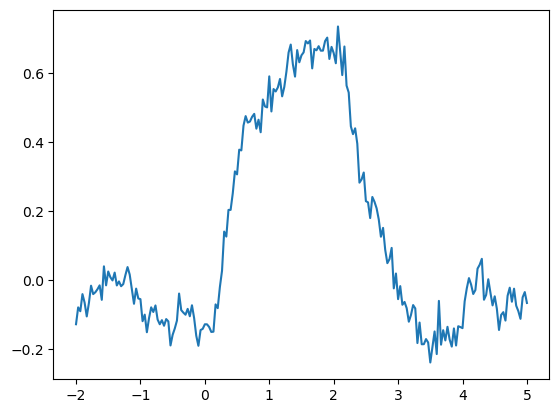

In [13]:
plt.plot(t, resp.mean(axis=0))

Randomly sample from the single PSTHs and compute the mean 10000 times

In [14]:
n_resample = 10000
resampled = np.zeros((n_resample, n_samples))
for i in range(n_resample):
    idx = np.random.choice(n_trials, n_trials)
    resampled[i] = resp[idx, :].mean(axis=0)

Plot the mean of the resampled data with a shaded area that is +/- 2 standard deviations around the mean. This is the confidence intercal where most of the data (~98%) falls into.

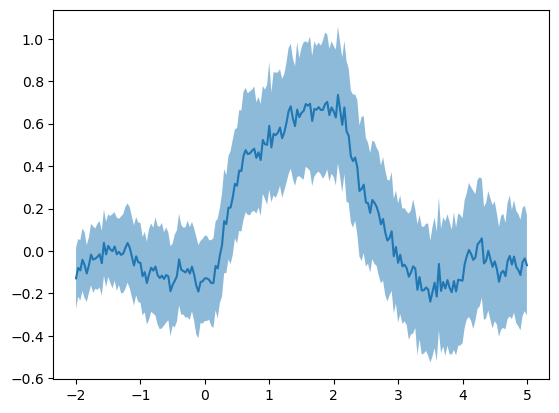

In [15]:
mean = resampled.mean(axis=0)
std = resampled.std(axis=0)
plt.plot(t, mean)
plt.fill_between(t, mean+2*std, mean-2*std, alpha=0.5)